In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
plt.style.use("ggplot")

df_demo = pd.read_csv("../data/raw/pilot_2_prolific_export_62970eb4c952c713ed347bf9.csv")

df = pd.read_csv("../data/raw/all_apps_wide-2022-06-01.csv")

df = df[df['participant.finished'] ==  1].copy().reset_index()

df = pd.merge(df_demo, df, left_on='participant_id', right_on='participant.label')

decision_cols = [col for col in df if col.endswith('decision')]

df[decision_cols] = df[decision_cols].replace("A", 1).replace("B", 0)

In [3]:
df.to_csv("../data/processed/pilot_2_merged.csv")

In [41]:
df

,session_id,participant_id,status,started_datetime,completed_date_time,time_taken,age,num_approvals,num_rejections,prolific_score,...,debrief.1.player.payoff,debrief.1.player.debrief,debrief.1.player.debrief2,debrief.1.group.id_in_subsession,debrief.1.subsession.round_number,thanks.1.player.id_in_group,thanks.1.player.role,thanks.1.player.payoff,thanks.1.group.id_in_subsession,thanks.1.subsession.round_number
0,6297649956729486371041f2,5e407f53008fe0000ca91bf7,APPROVED,2022-06-01 13:07:41.115000,2022-06-01 13:13:20.513000,339.398,30,578,4,99,...,0.0,majority,random,1,1,2,NaN,0.0,1,1
1,62976cd43fa33d3358c88a29,596e1cc639e9d00001b7bb84,APPROVED,2022-06-01 13:43:17.740000,2022-06-01 13:49:38.176000,380.436,42,687,5,99,...,0.0,sophisticated,only_c,1,1,3,NaN,0.0,1,1
2,62976d8a667ffceb341ddc47,5ce94777de266200151ea319,APPROVED,2022-06-01 13:45:57.051000,2022-06-01 13:55:04.906000,547.855,45,744,0,100,...,0.0,only_c,random,1,1,4,NaN,0.0,1,1
3,62976f0f4a0219e261d2d1b6,6147733299655bdb3bd8ecec,APPROVED,2022-06-01 13:52:32.450000,2022-06-01 13:59:18.231000,405.781,31,420,1,100,...,0.0,sophisticated,minority,1,1,6,NaN,0.0,1,1
4,62976f22e0cb17b9a6a6f229,613de8feaf700c5f5cd9e71a,APPROVED,2022-06-01 13:52:36.504000,2022-06-01 14:04:20.888000,704.384,29,277,0,100,...,0.0,only_d,only_c,1,1,7,NaN,0.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,62977cc5d51c1f6d6db24187,5be9d0b85b7ff700013c7bb7,APPROVED,2022-06-01 14:51:00.608000,2022-06-01 15:08:09.868000,1029.260,58,1142,2,100,...,0.0,minority,sophisticated,1,1,164,NaN,0.0,1,1
146,62977cc6f6e24b895808f493,6286672d0165aad8f1386c27,APPROVED,2022-06-01 14:50:51.384000,2022-06-01 14:59:15.027000,503.643,25,27,0,100,...,0.0,minority,majority,1,1,163,NaN,0.0,1,1
147,62977cdd3d5ac9385550e2ee,5f3ec6221b5af3158bc86acd,APPROVED,2022-06-01 14:51:09.357000,2022-06-01 15:00:51.209000,581.852,20,722,2,100,...,0.0,majority,majority,1,1,165,NaN,0.0,1,1
148,62977da0362c0f96d1018669,5e5aa39b15b8d429d07abfd4,APPROVED,2022-06-01 14:54:28.598000,2022-06-01 15:03:31.876000,543.278,56,687,7,99,...,0.0,random,majority,1,1,168,NaN,0.0,1,1


In [33]:
time_columns = [b for b in df.columns if 'player.time_spent' in b]
df[time_columns] = df[time_columns]/10

In [9]:
strategy_schedule = [18, 16, 14, 12, 10, 8, 6, 4, 2]

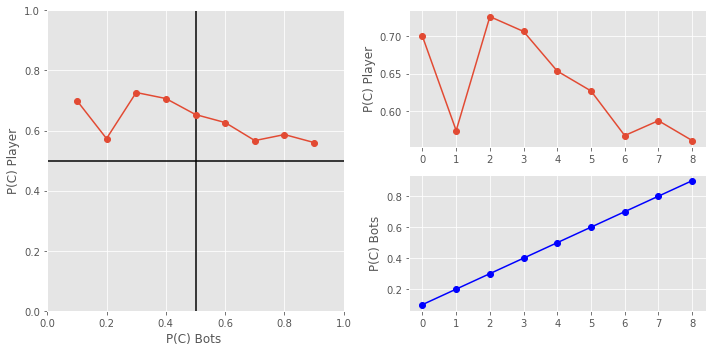

In [5]:
mean_round = df[decision_cols].mean().values
plt.figure(figsize=(10, 5))
plt.subplot(2, 2, 2)
plt.plot(mean_round, marker='o')
plt.ylabel("P(C) Player")

plt.subplot(2, 2, 4)
plt.plot(range(9), [1-n/20 for n in strategy_schedule], marker='o', color='blue')
plt.ylabel("P(C) Bots")

plt.subplot(1, 2, 1)
plt.plot([1-n/20 for n in strategy_schedule], mean_round, marker='o')
plt.hlines(0.5, 0, 1, color='black')
plt.vlines(0.5, 0, 1, color='black')
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.xlabel("P(C) Bots")
plt.ylabel("P(C) Player")
plt.tight_layout()

In [6]:
decision_cols[5:]

['bonus_game.6.player.decision',
 'bonus_game.7.player.decision',
 'bonus_game.8.player.decision',
 'bonus_game.9.player.decision']

In [7]:
df_before = df[decision_cols[2:4]].mean(1)
df_after = df[decision_cols[5:-2]].mean(1)


weak_herding_players = df_after > df_before
pure_herding_players = (df_before < 0.5) & (df_after > 0.5) # follow majority

# rational_players = df_after < df_before
pure_rational_players = (df_before > 0.5) & (df_after < 0.5) # follow minority

primarily_c_players = (df_before > 0.5) & (df_after > 0.5)
primarily_d_players = (df_before < 0.5) & (df_after < 0.5)

rational_cooperating_players = primarily_c_players & (df_before > df_after)
herding_cooperating_players = primarily_c_players & (df_before < df_after)
no_change_cooperating_players = primarily_c_players & (df_before == df_after)

rational_defecting_players = primarily_d_players & (df_before > df_after)
herding_defecting_players = primarily_d_players & (df_before < df_after)
no_change_defecting_players = primarily_d_players & (df_before == df_after)

print(f"""
- Pure:
\t- Rational: {pure_rational_players.mean():0.0%}
\t- Herders: {pure_herding_players.mean():0.0%}
- Cooperators: {primarily_c_players.mean():0.0%}
\t- Rational: {rational_cooperating_players.mean():0.0%}
\t- Herding: {herding_cooperating_players.mean():0.0%}
\t- No Change: {no_change_cooperating_players.mean():0.0%}
- Defectors: {primarily_d_players.mean():0.0%}
\t- Rational: {rational_defecting_players.mean():0.0%}
\t- Herding: {herding_defecting_players.mean():0.0%}
\t- No Change: {no_change_defecting_players.mean():0.0%}

Weark herding: {weak_herding_players.mean():0.0%}
""".strip())

- Pure:
	- Rational: 12%
	- Herders: 4%
- Cooperators: 33%
	- Rational: 0%
	- Herding: 0%
	- No Change: 33%
- Defectors: 5%
	- Rational: 0%
	- Herding: 0%
	- No Change: 5%

Weark herding: 19%


<AxesSubplot:>

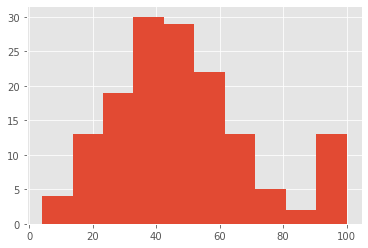

In [8]:
df['bret.1.player.boxes_collected'].hist()

<AxesSubplot:>

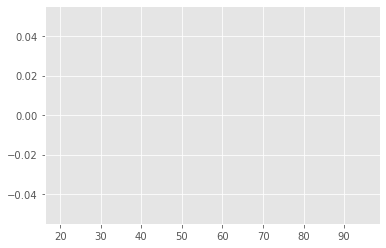

In [9]:
df[rational_cooperating_players]['bret.1.player.boxes_collected'].hist(bins=range(20, 100, 5))
df[herding_cooperating_players]['bret.1.player.boxes_collected'].hist(bins=range(20, 100, 5))

<AxesSubplot:>

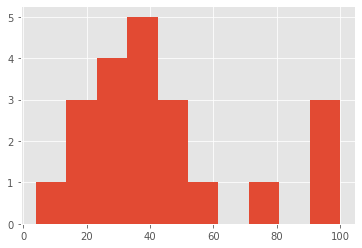

In [12]:
df[herding_cooperating_players]['bret.1.player.boxes_collected'].hist()

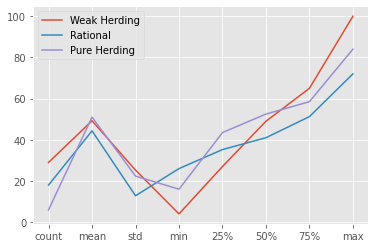

In [30]:
ax = df[weak_herding_players]['bret.1.player.boxes_collected'].describe().plot(label='Weak Herding')
df[pure_rational_players]['bret.1.player.boxes_collected'].describe().plot(ax=ax, label='Rational')
df[pure_herding_players]['bret.1.player.boxes_collected'].describe().plot(ax=ax, label='Pure Herding')
# df[primarily_d_players]['bret.1.player.boxes_collected'].describe().plot(ax=ax, label='D players')
plt.legend()

In [31]:
def plot_player_decision(player_id, **plotargs):
    df[decision_cols].iloc[player_id].plot(marker='x', **plotargs)
    plt.xticks(range(8), range(1, 9))
    plt.vlines(4, 0, 1, color='red')
    plt.legend()

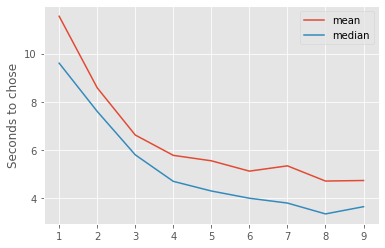

In [32]:
ax = df[time_columns].mean().plot(label='mean')
df[time_columns].median().plot(label='median')
# df[time_columns].std().plot(label='std')
# df[time_columns].max().plot(label='max')
# df[time_columns].min().plot(label='min')
plt.ylabel("Seconds to chose")
ax.set_xticklabels(range(11))
plt.legend()

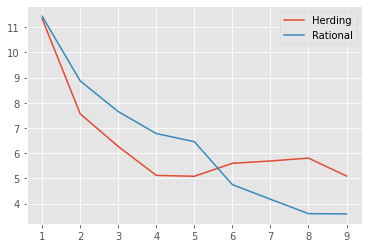

In [33]:
ax = df[weak_herding_players][time_columns].mean().plot(label='Herding')
df[pure_rational_players][time_columns].mean().plot(label='Rational')
ax.set_xticklabels(range(11))
plt.legend();

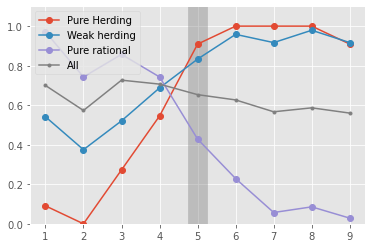

In [17]:
ax = df[pure_herding_players][decision_cols].mean().plot(label='Pure Herding', marker='o')
df[weak_herding_players][decision_cols].mean().plot(label='Weak herding', marker='o')
df[pure_rational_players][decision_cols].mean().plot(label='Pure rational', marker='o')
df[decision_cols].mean().plot(ax=ax, label='All', marker='.', color='gray')
plt.ylim(0, 1.1)
plt.axvspan(3.75, 4.25, 0, 1.1, color='gray', alpha=.4)
ax.set_xticklabels(range(11))
plt.legend()

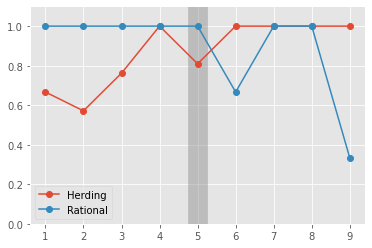

In [18]:
ax = df[herding_cooperating_players][decision_cols].mean().plot(label='Herding', marker='o')
df[rational_cooperating_players][decision_cols].mean().plot(label='Rational', marker='o')
plt.ylim(0, 1.1)
plt.axvspan(3.75, 4.25, 0, 1.1, color='gray', alpha=.4)
ax.set_xticklabels(range(11))
plt.legend()

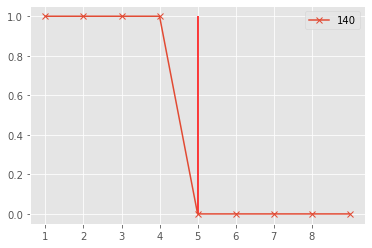

In [6]:
idx = df[df['participant.label'] == '611659cee3513143a375b369'].index[0]
plot_player_decision(idx)

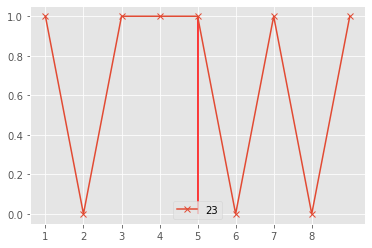

In [26]:
plot_player_decision(23)

<AxesSubplot:>

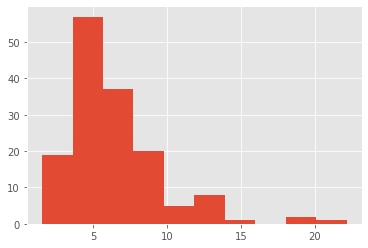

In [27]:
df[time_columns].mean(1).hist()

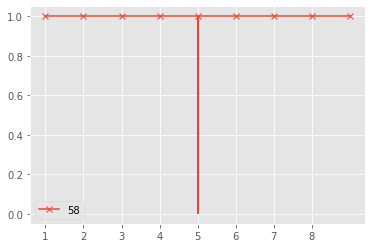

In [28]:
plot_player_decision(58)

In [29]:
payoff_cols = [c for c in df.columns if c.endswith('player.payoff')]

Text(0.5, 0, 'GPB won in total')

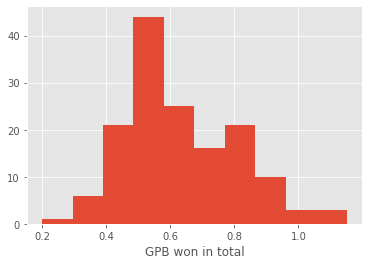

In [37]:
(df['participant.payoff'] * 0.005).hist()
plt.xlabel("GPB won in total")

Text(0.5, 0, 'GPB won in AB Game')

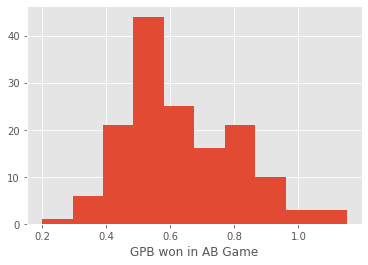

In [35]:
(df[payoff_cols].sum(1) * 0.005).hist()
plt.xlabel("GPB won in AB Game")

Text(0.5, 0, 'GPB won in Brett Game')

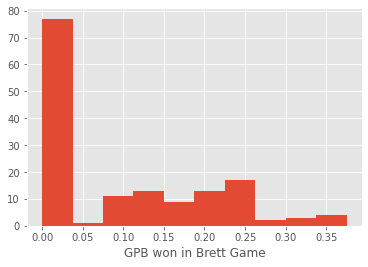

In [36]:
(df['bret.1.player.round_result'] * 0.005).hist()
plt.xlabel("GPB won in Brett Game")

In [48]:
df[df['participant_id'] == '611659cee3513143a375b369'].T[:25]

,140
session_id,62977c0ee0d5a5cc092b46c1
participant_id,611659cee3513143a375b369
status,APPROVED
started_datetime,2022-06-01 14:47:53.913000
completed_date_time,2022-06-01 14:47:56.224000
time_taken,2.311
age,37
num_approvals,318
num_rejections,2
prolific_score,100


In [51]:
df.groupby('Highest education level completed').size()

Highest education level completed
Doctorate degree (PhD/other)             9
Graduate degree (MA/MSc/MPhil/other)    34
High school diploma/A-levels            18
Secondary education (e.g. GED/GCSE)     11
Technical/community college             18
Undergraduate degree (BA/BSc/other)     60
dtype: int64

In [61]:
df.groupby('Charitable Giving').size()

Charitable Giving
£0           24
£1-£50       76
£101-£200     8
£201-£500    16
£50-£75      10
£501+         5
£75-£100     11
dtype: int64

In [ ]:
df['participant']

In [27]:
def extract_round_df(df, game_round):
    cols = [c for c in df.columns if c.startswith(f'bonus_game.{game_round}.')]
    cols.insert(0, 'participant.label')
    df_1 = df[cols].copy()
    df_1.columns = [c.split(f'.{game_round}.')[-1].replace('.', '_') for c in cols]
    df_1['round'] = game_round
    return df_1

In [28]:
dfs = []
for i in range(1, 9):
    df_round = extract_round_df(df, i)
    dfs.append(df_round)

In [29]:
df_all = pd.concat(dfs)

In [30]:
df_all

,participant_label,player_id_in_group,player_role,player_payoff,player_time_spent,player_potential_payoff,player_decision,group_id_in_subsession,subsession_round_number,round
0,5e407f53008fe0000ca91bf7,2,NaN,0.0,96.0,0.0,1,1,1,1
1,596e1cc639e9d00001b7bb84,3,NaN,0.0,103.0,0.0,0,1,1,1
2,5ce94777de266200151ea319,4,NaN,0.0,146.0,0.0,0,1,1,1
3,6147733299655bdb3bd8ecec,6,NaN,0.0,72.0,0.0,1,1,1,1
4,613de8feaf700c5f5cd9e71a,7,NaN,0.0,70.0,0.0,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...
145,5be9d0b85b7ff700013c7bb7,164,NaN,0.0,42.0,160.0,0,1,8,8
146,6286672d0165aad8f1386c27,163,NaN,0.0,26.0,160.0,0,1,8,8
147,5f3ec6221b5af3158bc86acd,165,NaN,0.0,40.0,112.0,1,1,8,8
148,5e5aa39b15b8d429d07abfd4,168,NaN,0.0,58.0,160.0,0,1,8,8


In [31]:
round_propo = pd.DataFrame(
    {
        "round": range(1, 10),
        "n_defecotrs": strategy_schedule
    }
)

In [32]:
df_all = pd.merge(df_all, round_propo)

In [35]:
df_all

,participant_label,player_id_in_group,player_role,player_payoff,player_time_spent,player_potential_payoff,player_decision,group_id_in_subsession,subsession_round_number,round,n_defecotrs
0,5e407f53008fe0000ca91bf7,2,NaN,0.0,96.0,0.0,1,1,1,1,18
1,596e1cc639e9d00001b7bb84,3,NaN,0.0,103.0,0.0,0,1,1,1,18
2,5ce94777de266200151ea319,4,NaN,0.0,146.0,0.0,0,1,1,1,18
3,6147733299655bdb3bd8ecec,6,NaN,0.0,72.0,0.0,1,1,1,1,18
4,613de8feaf700c5f5cd9e71a,7,NaN,0.0,70.0,0.0,0,1,1,1,18
...,...,...,...,...,...,...,...,...,...,...,...
1195,5be9d0b85b7ff700013c7bb7,164,NaN,0.0,42.0,160.0,0,1,8,8,4
1196,6286672d0165aad8f1386c27,163,NaN,0.0,26.0,160.0,0,1,8,8,4
1197,5f3ec6221b5af3158bc86acd,165,NaN,0.0,40.0,112.0,1,1,8,8,4
1198,5e5aa39b15b8d429d07abfd4,168,NaN,0.0,58.0,160.0,0,1,8,8,4


In [36]:
df_all = pd.merge(df_demo, df_all, left_on='participant_id', right_on='participant_label')

In [38]:
df_all.head()

,session_id,status,started_datetime,completed_date_time,time_taken,age,num_approvals,num_rejections,prolific_score,reviewed_at_datetime,...,player_id_in_group,player_role,player_payoff,player_time_spent,player_potential_payoff,player_decision,group_id_in_subsession,subsession_round_number,round,n_defecotrs
0,6297649956729486371041f2,APPROVED,2022-06-01 13:07:41.115000,2022-06-01 13:13:20.513000,339.398,30,578,4,99,2022-06-01 13:17:03.441000,...,2,NaN,0.0,96.0,0.0,1,1,1,1,18
1,6297649956729486371041f2,APPROVED,2022-06-01 13:07:41.115000,2022-06-01 13:13:20.513000,339.398,30,578,4,99,2022-06-01 13:17:03.441000,...,2,NaN,0.0,71.0,88.0,1,1,2,2,16
2,6297649956729486371041f2,APPROVED,2022-06-01 13:07:41.115000,2022-06-01 13:13:20.513000,339.398,30,578,4,99,2022-06-01 13:17:03.441000,...,2,NaN,0.0,85.0,92.0,0,1,3,3,14
3,6297649956729486371041f2,APPROVED,2022-06-01 13:07:41.115000,2022-06-01 13:13:20.513000,339.398,30,578,4,99,2022-06-01 13:17:03.441000,...,2,NaN,0.0,125.0,80.0,0,1,4,4,12
4,6297649956729486371041f2,APPROVED,2022-06-01 13:07:41.115000,2022-06-01 13:13:20.513000,339.398,30,578,4,99,2022-06-01 13:17:03.441000,...,2,NaN,0.0,47.0,100.0,1,1,5,5,10


In [68]:
bret = [c for c in df.columns if c.startswith('bret')]
bret.insert(0, "participant.label")

In [69]:
bret_df = df[bret].copy()

In [70]:
bret_df.columns = [c.replace('bret.1.player.', '').replace('.', '_') for c in bret]


In [71]:
bret_df.to_csv('../data/processed/pilot_2_bret.csv')

In [72]:
df_all = pd.merge(df_all, bret_df, on='participant_label')

In [73]:
df_all.to_csv('../data/processed/pilot_2_merged.csv')

In [28]:
[c for c in df.columns if 'potential_payoff' in c][0]

['bonus_game.2.player.potential_payoff',
 'bonus_game.3.player.potential_payoff',
 'bonus_game.4.player.potential_payoff',
 'bonus_game.5.player.potential_payoff',
 'bonus_game.6.player.potential_payoff',
 'bonus_game.7.player.potential_payoff',
 'bonus_game.8.player.potential_payoff',
 'bonus_game.9.player.potential_payoff']

In [71]:
df[['bret.1.player.payoff', 'bret.1.player.boxes_collected']].describe()

,bret.1.player.payoff,bret.1.player.boxes_collected
count,150.000000,150.000000
mean,18.733333,48.780000
std,21.853283,22.934067
min,0.000000,4.000000
25%,0.000000,34.000000
50%,2.000000,45.500000
75%,40.000000,60.000000
max,75.000000,100.000000


In [81]:
df[(df['bret.1.player.payoff'] > 0)]['bret.1.player.boxes_collected'].median()

40.0

In [82]:
df[(df['bret.1.player.payoff'] == 0)]['bret.1.player.boxes_collected'].median()

58.0

In [107]:
df[[c for c in df.columns if 'player.payoff' in c]].max(1).describe().T

count    150.000000
mean     107.893333
std       28.078305
min       40.000000
25%       92.000000
50%      104.000000
75%      116.000000
max      180.000000
dtype: float64

In [59]:
df[[c for c in df.columns if 'potential_payoff' in c][1:]].mean().describe()

count      8.000000
mean     106.040000
std       24.817104
min       73.600000
25%       88.306667
50%      104.773333
75%      123.160000
max      142.453333
dtype: float64

In [44]:
df['time_taken'].describe()

count     150.000000
mean      451.267500
std       155.726013
min         2.311000
25%       364.572250
50%       414.302500
75%       512.358000
max      1105.332000
Name: time_taken, dtype: float64

In [46]:
414 / 60

6.9

In [52]:
(6/60)*7

0.7000000000000001

In [56]:
df['bonus_game.9.player.potential_payoff'].max()

180.0

In [58]:
(180+70)/2

125.0

In [90]:
df[[c for c in df.columns if 'potential_payoff' in c][1:]].mean().describe()

count     12.000000
mean     106.702222
std       28.703068
min       73.600000
25%       77.160000
50%      104.773333
75%      135.213333
max      142.453333
dtype: float64

In [66]:
df['bonus_game.10.player.potential_payoff'] = df['bonus_game.9.player.potential_payoff']
df['bonus_game.11.player.potential_payoff'] = df['bonus_game.9.player.potential_payoff']

In [70]:
115/2+9

66.5

In [89]:
df['bonus_game.-1.player.potential_payoff'] = df['bonus_game.2.player.potential_payoff']
df['bonus_game.-2.player.potential_payoff'] = df['bonus_game.2.player.potential_payoff']

In [94]:
df[[c for c in df.columns if 'potential_payoff' in c][1:]].std()

bonus_game.2.player.potential_payoff     22.070053
bonus_game.3.player.potential_payoff     15.879997
bonus_game.4.player.potential_payoff      7.154617
bonus_game.5.player.potential_payoff      0.000000
bonus_game.6.player.potential_payoff      7.640045
bonus_game.7.player.potential_payoff     15.529918
bonus_game.8.player.potential_payoff     23.865394
bonus_game.9.player.potential_payoff     31.621203
bonus_game.10.player.potential_payoff    31.621203
bonus_game.11.player.potential_payoff    31.621203
bonus_game.-1.player.potential_payoff    22.070053
bonus_game.-2.player.potential_payoff    22.070053
dtype: float64

In [96]:
df['num_approvals'].describe()

count     150.000000
mean      660.113333
std       496.895929
min         6.000000
25%       319.000000
50%       523.000000
75%       857.500000
max      3024.000000
Name: num_approvals, dtype: float64

In [105]:
df[[c for c in df.columns if 'player.payoff' in c]].sum(1).describe()

count    150.000000
mean     126.626667
std       35.690983
min       40.000000
25%      100.000000
50%      119.000000
75%      153.000000
max      230.000000
dtype: float64

In [109]:
df['bret.1.player.payoff'].describe()

count    150.000000
mean      18.733333
std       21.853283
min        0.000000
25%        0.000000
50%        2.000000
75%       40.000000
max       75.000000
Name: bret.1.player.payoff, dtype: float64